<a href="https://colab.research.google.com/github/RajPaw/ML-Projects/blob/main/gps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd


data = {
    'eventId': [1, 2, 3, 4, 5],
    'eventCount': [1, 1, 1, 10, 1],
    'uuid': [
        'bd7b10e3-9199-3ee8-866b-1a08574fed07',
        'bd7b10e3-9199-3ee8-866b-1a08574fed07',
        'bd7b10e3-9199-3ee8-866b-1a08574fed07',
        'bd7b10e3-9199-3ee8-866b-1a08574fed07',
        'bd7b10e3-9199-3ee8-866b-1a08574fed07'
    ],
    'eventFlag': [557056, 32768, 32768, 557056, 557056],
    'ipAddress': [
        '107.242.121.1',
        '',
        '',
        '107.242.121.1',
        '107.242.121.1'
    ],
    'timestamp': [1.688E+12, 1.688E+12, 1.688E+12, 1.688E+12, 1.688E+12],
    'timezone': [
        'America/Los_Angeles',
        'America/Los_Angeles',
        'America/Los_Angeles',
        'America/Los_Angeles',
        'America/Los_Angeles'
    ],
    'latitude': [41.039148, 41.03917, 41.03913, 41.039177, 41.039182],
    'longitude': [-122.39544, -122.39547, -122.39544, -122.39542, -122.39544]
}

df = pd.DataFrame(data)

df.to_csv('gps_events_data.csv', index=False)

print("Data saved to 'gps_events_data.csv'")


Data saved to 'gps_events_data.csv'


In [19]:
import pandas as pd

data = pd.read_csv('gps_events_data.csv')

data.to_csv('gps_data.csv', index=False)


In [20]:
from google.colab import files
files.download('gps_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:

import pandas as pd
import io

df = pd.read_csv('gps_data.csv')
df.head(5)

,eventId,eventCount,uuid,eventFlag,ipAddress,timestamp,timezone,latitude,longitude
0,1,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,557056,107.242.121.1,1.688000e+12,America/Los_Angeles,41.039148,-122.39544
1,2,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,32768,NaN,1.688000e+12,America/Los_Angeles,41.039170,-122.39547
2,3,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,32768,NaN,1.688000e+12,America/Los_Angeles,41.039130,-122.39544
3,4,10,bd7b10e3-9199-3ee8-866b-1a08574fed07,557056,107.242.121.1,1.688000e+12,America/Los_Angeles,41.039177,-122.39542
4,5,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,557056,107.242.121.1,1.688000e+12,America/Los_Angeles,41.039182,-122.39544


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



In [27]:
df=df.shape
df

(5, 9)

In [ ]:
## Data Cleaning

In [23]:
data['eventFlag'].fillna(0, inplace=True)
data

,eventId,eventCount,uuid,eventFlag,ipAddress,timestamp,timezone,latitude,longitude
0,1,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,557056,107.242.121.1,1.688000e+12,America/Los_Angeles,41.039148,-122.39544
1,2,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,32768,NaN,1.688000e+12,America/Los_Angeles,41.039170,-122.39547
2,3,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,32768,NaN,1.688000e+12,America/Los_Angeles,41.039130,-122.39544
3,4,10,bd7b10e3-9199-3ee8-866b-1a08574fed07,557056,107.242.121.1,1.688000e+12,America/Los_Angeles,41.039177,-122.39542
4,5,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,557056,107.242.121.1,1.688000e+12,America/Los_Angeles,41.039182,-122.39544


In [44]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

In [45]:
data.drop_duplicates(inplace=True)


In [ ]:
## EDA (Exploratory Data Analysis)

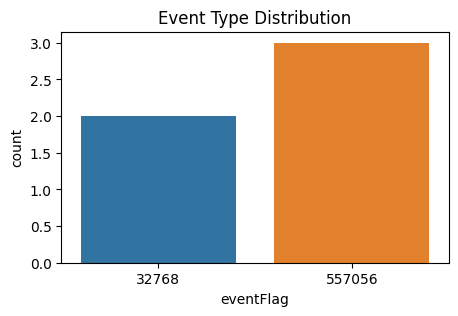

In [47]:
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x='eventFlag')
plt.title('Event Type Distribution')
plt.show()

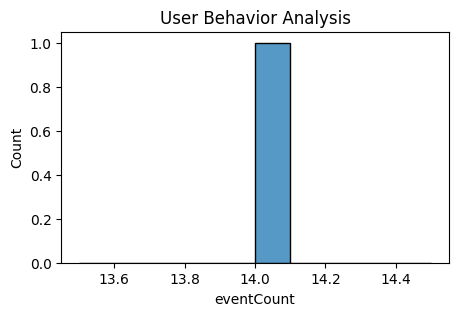

In [51]:
user_behavior = data.groupby('uuid')['eventCount'].sum().reset_index()
plt.figure(figsize=(5, 3))
sns.histplot(data=user_behavior, x='eventCount', bins=10)
plt.title('User Behavior Analysis')
plt.show()

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['eventCount_zscore'] = scaler.fit_transform(data[['eventCount']])
anomalies = data[data['eventCount_zscore'].abs() > 3]

In [56]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = data[['latitude', 'longitude']]
y = data['eventCount']
model.fit(X, y)

LinearRegression()

In [58]:
import folium

m = folium.Map(location=[41.039148, -122.39544], zoom_start=15)
for idx, row in data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(m)
m.save('gps_map.html')

display(m)


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


data = pd.read_csv('gps_data.csv')

# Select features (independent variables)
# Example: Using 'eventFlag', 'latitude', and 'longitude' as features
X = data[['eventFlag', 'latitude', 'longitude']]

# Target variable (dependent variable)
y = data['eventCount']

# Splitted the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Created and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")



Mean Absolute Error (MAE): 13.50000000745058
Mean Squared Error (MSE): 182.25000020116568
R-squared (R2) Score: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
